In [107]:
import numpy as np
import cupy as cp
import nibabel as nib
from structure_tensor.cp import eig_special_3d, structure_tensor_3d


In [108]:
# Function to save tensor arrays
def save_tensor_arrays(filename, tensor_data):
    np.save(filename, tensor_data)


In [109]:

# Replace 'your_file.nii' with the path to your NIfTI file
nifti_file = '/space/aspasia/2/users/code/structens/tractography-testset/I58_hipct/484um_rotated/4bin_rotate_rescale_121.04um_I58.nii'


In [110]:
# Load NIfTI file
img = nib.load(nifti_file)
volume = img.get_fdata() # convert the nifti image object to numpy array

In [111]:
img.shape


(333, 294, 294)

In [112]:
img

In [113]:
# Transfer data to CuPy array
volume_cp = cp.array(volume)

In [114]:
volume_cp.shape


(333, 294, 294)

In [115]:
s_index = volume_cp.shape[2] // 2
s_img = volume_cp[:,:,s_index]

In [116]:
import matplotlib.pyplot as plt

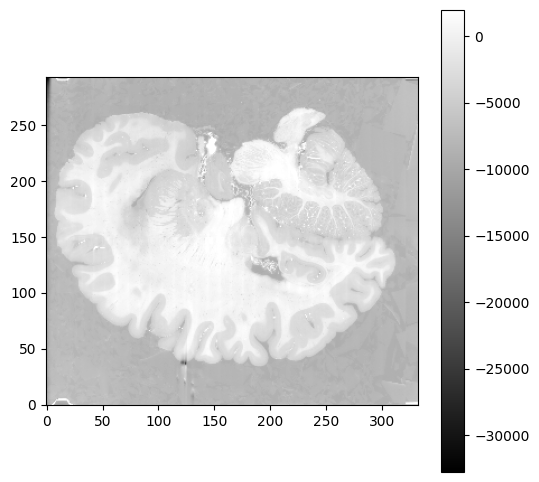

In [117]:
s_img_array = np.array(s_img.get())
plt.figure(figsize=(6,6))
plt.imshow(s_img_array.T, cmap="gray", origin="lower")
plt.colorbar()
plt.show()

In [118]:
# Parameters for the structure tensor calculation
sigma = 0.5
rho = 1


In [119]:
# Compute the structure tensor using CuPy
S_cp = structure_tensor_3d(volume_cp, sigma, rho)

In [120]:
S_cp.shape

(6, 333, 294, 294)

In [121]:
# Compute eigenvalues and eigenvectors using CuPy
val_cp, vec_cp = eig_special_3d(S_cp)


In [122]:
# Transfer eigenvectors back to NumPy array
vec_normalized = cp.asnumpy(vec_cp)


In [123]:
# Ensure the shape of vec_normalized matches volume_shape + (3,)
if vec_normalized.shape != (3, *volume.shape):
    raise ValueError("Shape mismatch between volume and vectors")


In [124]:
# Transpose to shape (972, 972, 100, 3) for RGB format
vec_normalized_rgb = np.transpose(vec_normalized, (1, 2, 3, 0))


In [125]:
# Save eigenvectors as a RGB NIfTI file
# output_file = '/autofs/space/atropos_001/users/shruti/structtens/python-implementation'
# nib.save(nib.Nifti1Image(vec_normalized_rgb.astype(np.float32), img.affine), output_file)

In [126]:

# print(f"Eigenvectors saved as {output_file}")

Eigenvectors saved as /autofs/space/atropos_001/users/shruti/structtens/python-implementation


In [127]:

# Replace 'your_file.nii' with the path to your NIfTI file
# Output_nifti_file = '/autofs/space/atropos_001/users/shruti/structtens/python-implementation.nii'
# O_img = nib.load(Output_nifti_file)
# O_volume = O_img.get_fdata()


In [128]:
# O_img

In [129]:
# O_img.shape

(333, 294, 294, 3)

In [130]:
# O_volume.shape

(333, 294, 294, 3)

In [131]:
# slice_index = O_volume.shape[2]//2
# slice_img = O_volume[:,:,slice_index]

In [132]:
# plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998807907104..0.9999998211860657].


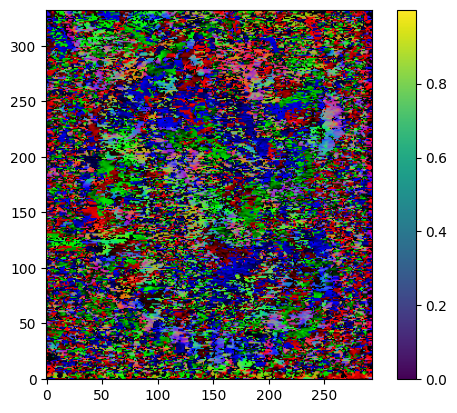

In [133]:
# plt.imshow(slice_img, origin="lower")
# plt.colorbar()
# plt.show()